In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import os

In [2]:
dfs = []

for bestand in os.listdir("scrapers/csvs"):
    if bestand.endswith(".csv"):
        bestandspad = os.path.join("scrapers/csvs", bestand)
        if os.path.getsize(bestandspad) > 0:
            df_temp = pd.read_csv(bestandspad)
    
        scraperNaam = bestand.split("_")[1]
        WebsiteNaam = "http://www.localhost:" + bestand.split("_")[0]
        df_temp["scraper"] = scraperNaam
        df_temp["website"] = WebsiteNaam
        dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)
df.head(20)




,titel,rating,descriptie,artikel_nummer,oude_prijs,prijs,fotos,status_code,request_time,scraper,website,page_load_time
0,Product 1,4.0,Lorem ipsum dolor sit amet for Product 1,406558.0,NaN,100.0,"['http://localhost:3000/img/products/04.jpg', ...",200,2036,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
1,Product 2,3.0,Lorem ipsum dolor sit amet for Product 2,140498.0,NaN,100.0,"['http://localhost:3000/img/products/02.jpg', ...",200,2022,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
2,Product 3,3.0,Lorem ipsum dolor sit amet for Product 3,364171.0,150.0,100.0,"['http://localhost:3000/img/products/04.jpg', ...",200,2039,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
3,Product 4,5.0,Lorem ipsum dolor sit amet for Product 4,949962.0,NaN,100.0,"['http://localhost:3000/img/products/01.jpg', ...",200,2026,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
4,Product 5,3.0,Lorem ipsum dolor sit amet for Product 5,829538.0,NaN,100.0,"['http://localhost:3000/img/products/01.jpg', ...",200,2028,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
5,Product 6,1.0,Lorem ipsum dolor sit amet for Product 6,382860.0,NaN,100.0,"['http://localhost:3000/img/products/02.jpg', ...",200,2021,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
6,Product 7,2.0,Lorem ipsum dolor sit amet for Product 7,168256.0,NaN,100.0,"['http://localhost:3000/img/products/02.jpg', ...",200,2041,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
7,Product 8,1.0,Lorem ipsum dolor sit amet for Product 8,376260.0,NaN,100.0,"['http://localhost:3000/img/products/04.jpg', ...",200,2033,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
8,Product 9,1.0,Lorem ipsum dolor sit amet for Product 9,261993.0,NaN,100.0,"['http://localhost:3000/img/products/01.jpg', ...",200,2025,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN
9,Product 10,4.0,Lorem ipsum dolor sit amet for Product 10,779439.0,150.0,100.0,"['http://localhost:3000/img/products/02.jpg', ...",200,2053,BeautifulSoup-CSS-Selectors,http://www.localhost:3000,NaN


In [3]:
#verander de kolom website naar anti-webscrapingstechniek en verander de waardes naar de juiste anti-webscrapingstechniek
df = df.rename(columns={"website": "anti-webscrapingtechniek"})

df.loc[df["anti-webscrapingtechniek"] == "http://www.localhost:3000", "anti-webscrapingtechniek"] = "geen"
df.loc[df["anti-webscrapingtechniek"] == "http://www.localhost:3001", "anti-webscrapingtechniek"] = "CSS-Selectors"
df.loc[df["anti-webscrapingtechniek"] == "http://www.localhost:3002", "anti-webscrapingtechniek"] = "Dynamic Tree"
df.loc[df["anti-webscrapingtechniek"] == "http://www.localhost:3003", "anti-webscrapingtechniek"] = "rate limiting"
df.loc[df["anti-webscrapingtechniek"] == "http://www.localhost:3004", "anti-webscrapingtechniek"] = "delayed loading"

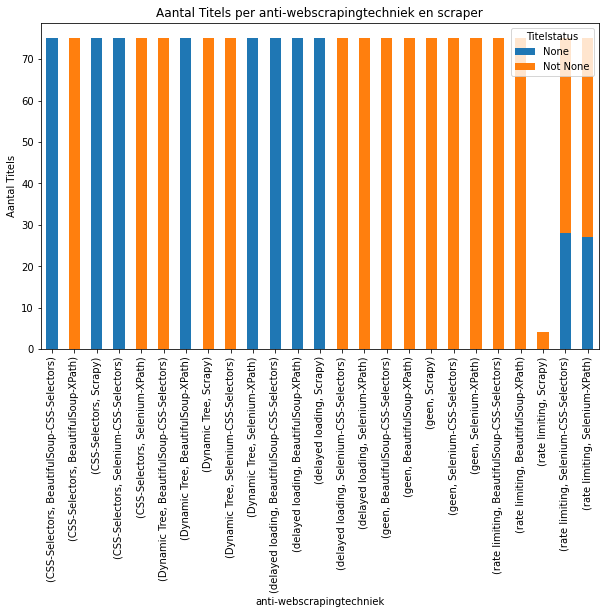

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Eerst groeperen op "anti-webscrapingtechniek" en "scraper"
grouped = df.groupby(["anti-webscrapingtechniek", "scraper"])

# Het aantal "None"-waarden en niet-"None"-waarden per groep tellen
def count_none_and_not_none_titles(titles):
    none_count = titles.isnull().sum()
    not_none_count = titles.count()
    return pd.Series({"None": none_count, "Not None": not_none_count})

title_counts = grouped["titel"].apply(count_none_and_not_none_titles)

# Het aantal "None"-waarden en niet-"None"-waarden per groep omzetten in een staafdiagram
ax = title_counts.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel("anti-webscrapingtechniek")
ax.set_ylabel("Aantal Titels")
ax.set_title("Aantal Titels per anti-webscrapingtechniek en scraper")
ax.legend(title="Titelstatus")

plt.show()


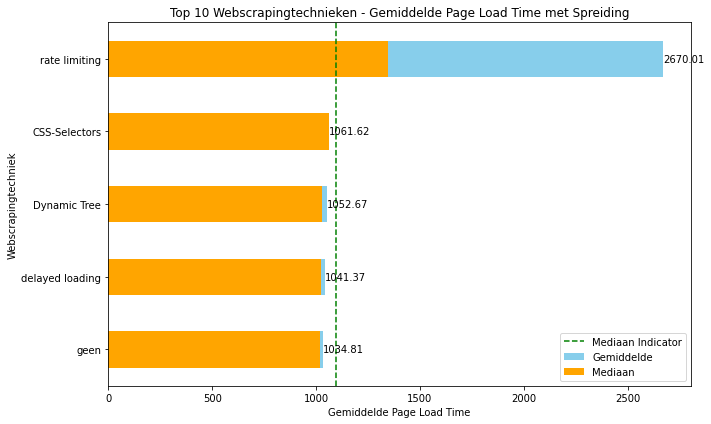

In [41]:

# Bereken het gemiddelde en de mediaan
mean_page_load_time = df.groupby("anti-webscrapingtechniek")["page_load_time"].mean()
median_page_load_time = df.groupby("anti-webscrapingtechniek")["page_load_time"].median()

# Beperk het aantal anti-webscrapingtechnieken om in te zoomen op de top van de bars
top_n = 10  
mean_page_load_time = mean_page_load_time.nlargest(top_n)
median_page_load_time = median_page_load_time.nlargest(top_n)

# Bereken de spreiding (standaardafwijking)
std_deviation = df.groupby("anti-webscrapingtechniek")["page_load_time"].std()
std_deviation = std_deviation.nlargest(top_n)

# Maak een staafdiagram met horizontale balken (barh)
fig, ax = plt.subplots(figsize=(10, 6))
mean_page_load_time.plot(kind="barh", ax=ax, color="skyblue", label="Gemiddelde")
median_page_load_time.plot(kind="barh", ax=ax, color="orange", label="Mediaan")

ax.set_xlabel("Gemiddelde Page Load Time")
ax.set_ylabel("Webscrapingtechniek")
ax.set_title(f"Top {top_n} Webscrapingtechnieken - Gemiddelde Page Load Time met Spreiding")
ax.invert_yaxis()  # Keer de y-as om voor betere weergave

# Voeg waarden toe aan de staafdiagrammen
for index, value in enumerate(mean_page_load_time):
    ax.text(value, index, f"{value:.2f}", va="center")

# Aanpassing 2: Voeg de mediaan aan als een indicatorlijn
median_indicator = median_page_load_time.mean()
ax.axvline(x=median_indicator, color='green', linestyle='--', label="Mediaan Indicator")

# Voeg een legenda toe
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


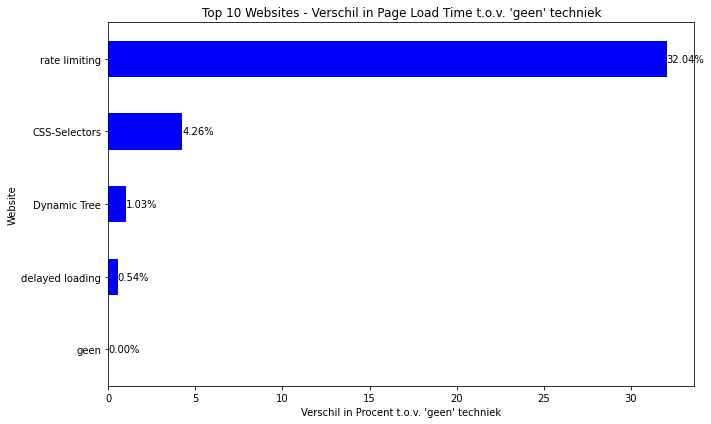

In [45]:
median_page_load_time = df.groupby("anti-webscrapingtechniek")["page_load_time"].median()
median_page_load_time = median_page_load_time.sort_values(ascending=False)

median_page_load_time_geen = median_page_load_time["geen"]

median_page_load_time_diff = ((median_page_load_time - median_page_load_time_geen) / median_page_load_time_geen) * 100

top_n = 10
median_page_load_time_diff = median_page_load_time_diff.head(top_n)

fig, ax = plt.subplots(figsize=(10, 6))
median_page_load_time_diff.plot(kind="barh", ax=ax, color="blue")
ax.set_xlabel("Verschil in Procent t.o.v. 'geen' techniek")
ax.set_ylabel("Website")
ax.set_title(f"Top {top_n} Websites - Verschil in Page Load Time t.o.v. 'geen' techniek")
ax.invert_yaxis()

for index, value in enumerate(median_page_load_time_diff):
    ax.text(value, index, f"{value:.2f}%", va="center")

plt.tight_layout()
plt.show()


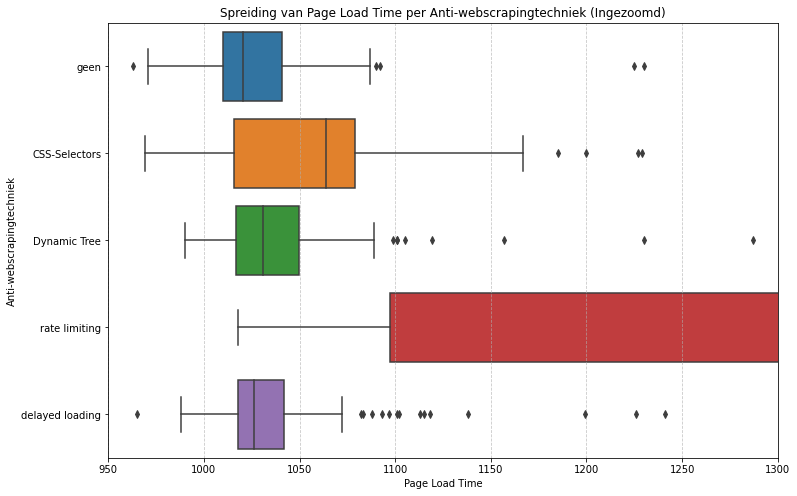

In [33]:
# Maak een boxplot voor de spreiding van Page Load Time gegroepeerd op anti-webscrapingtechniek
plt.figure(figsize=(12, 8))
sns.boxplot(x="page_load_time", y="anti-webscrapingtechniek", data=df, orient="h")
plt.xlabel("Page Load Time")
plt.ylabel("Anti-webscrapingtechniek")
plt.title("Spreiding van Page Load Time per Anti-webscrapingtechniek (Ingezoomd)")
plt.xlim(950, 1300)  # Beperk de x-as tot een bereik van 0 tot 10 seconden (pas dit aan naar jouw behoefte)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


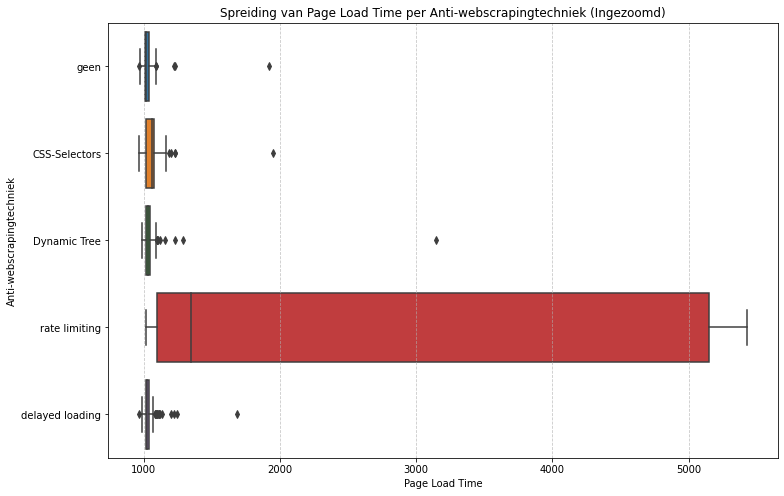

In [31]:
# Maak een boxplot voor de spreiding van Page Load Time gegroepeerd op anti-webscrapingtechniek
plt.figure(figsize=(12, 8))
sns.boxplot(x="page_load_time", y="anti-webscrapingtechniek", data=df, orient="h")
plt.xlabel("Page Load Time")
plt.ylabel("Anti-webscrapingtechniek")
plt.title("Spreiding van Page Load Time per Anti-webscrapingtechniek (Uitgezoomd)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

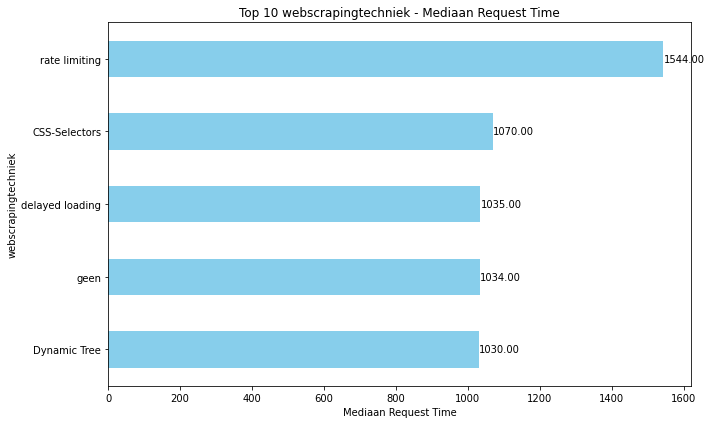

In [17]:
median_page_load_time = df.groupby("anti-webscrapingtechniek")["request_time"].median()

median_page_load_time = median_page_load_time.sort_values(ascending=False)

# Beperk het aantal anti-webscrapingtechnieken om in te zoomen op de top van de bars
top_n = 10  
median_page_load_time = median_page_load_time.head(top_n)

# Maak een staafdiagram met horizontale balken (barh)
fig, ax = plt.subplots(figsize=(10, 6))
median_page_load_time.plot(kind="barh", ax=ax, color="skyblue")
ax.set_xlabel("Mediaan Request Time")
ax.set_ylabel("webscrapingtechniek")
ax.set_title(f"Top {top_n} webscrapingtechniek - Mediaan Request Time")
ax.invert_yaxis() 

# Voeg waarden toe aan de staafdiagrammen
for index, value in enumerate(median_page_load_time):
    ax.text(value, index, f"{value:.2f}", va="center")

plt.tight_layout()
plt.show()

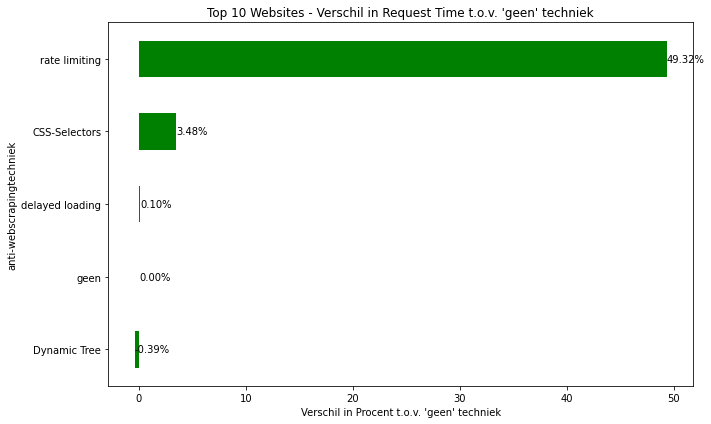

In [18]:

median_request_time = df.groupby("anti-webscrapingtechniek")["request_time"].median()


median_request_time = median_request_time.sort_values(ascending=False)


median_request_time_geen = median_request_time["geen"]

# Bereken het verschil in procenten ten opzichte van de "geen" techniek
median_request_time_diff = ((median_request_time - median_request_time_geen) / median_request_time_geen) * 100


top_n = 10  
median_request_time_diff = median_request_time_diff.head(top_n)

fig, ax = plt.subplots(figsize=(10, 6))
median_request_time_diff.plot(kind="barh", ax=ax, color="green")
ax.set_xlabel("Verschil in Procent t.o.v. 'geen' techniek")
ax.set_ylabel("anti-webscrapingtechniek")
ax.set_title(f"Top {top_n} Websites - Verschil in Request Time t.o.v. 'geen' techniek")
ax.invert_yaxis()  

for index, value in enumerate(median_request_time_diff):
    ax.text(value, index, f"{value:.2f}%", va="center")

plt.tight_layout()
plt.show()


In [19]:
# Eerst filteren op de "rate limiting" anti-webscrapingtechniek
filtered_df = df[df["anti-webscrapingtechniek"] == "rate limiting"]

status_code_counts = filtered_df.groupby(["scraper", "status_code"])["status_code"].count()

print(status_code_counts)

scraper                      status_code
BeautifulSoup-CSS-Selectors  200            75
BeautifulSoup-XPath          200            75
Scrapy                       200             4
Selenium-CSS-Selectors       200            69
                             429             6
Selenium-XPath               200            67
                             429             8
Name: status_code, dtype: int64
